In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage

In [9]:
df = pd.read_csv('customer.csv')
df.drop('CustomerID',axis=1,inplace=True)
df

,Age,Annual_Income,Spending_Score,Online_Time(hrs/week),Purchases_per_Month
0,56,23343,17,21,2
1,69,33500,13,11,33
2,46,73222,84,40,33
3,32,49375,25,11,13
4,60,29662,68,36,30
...,...,...,...,...,...
495,65,115462,51,33,35
496,42,26229,53,10,2
497,57,76793,36,40,27
498,62,67915,26,32,2


In [10]:
x = df.values
x

array([[   56, 23343,    17,    21,     2],
       [   69, 33500,    13,    11,    33],
       [   46, 73222,    84,    40,    33],
       ...,
       [   57, 76793,    36,    40,    27],
       [   62, 67915,    26,    32,     2],
       [   18, 24632,    29,    33,    35]], shape=(500, 5))

In [11]:
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)

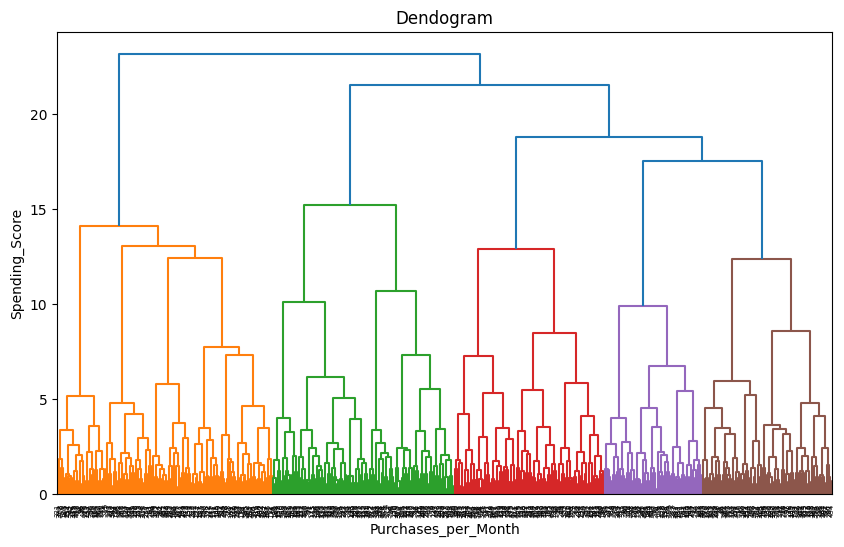

In [12]:
linked = linkage(x_scaled, method = 'ward')


plt.figure (figsize = (10,6))
dendrogram(linked)
plt.title("Dendogram")
plt.xlabel("Purchases_per_Month")
plt.ylabel("Spending_Score")
plt.show()

In [13]:
model = AgglomerativeClustering(n_clusters = 2, linkage= 'ward')

labels = model.fit_predict(x_scaled)

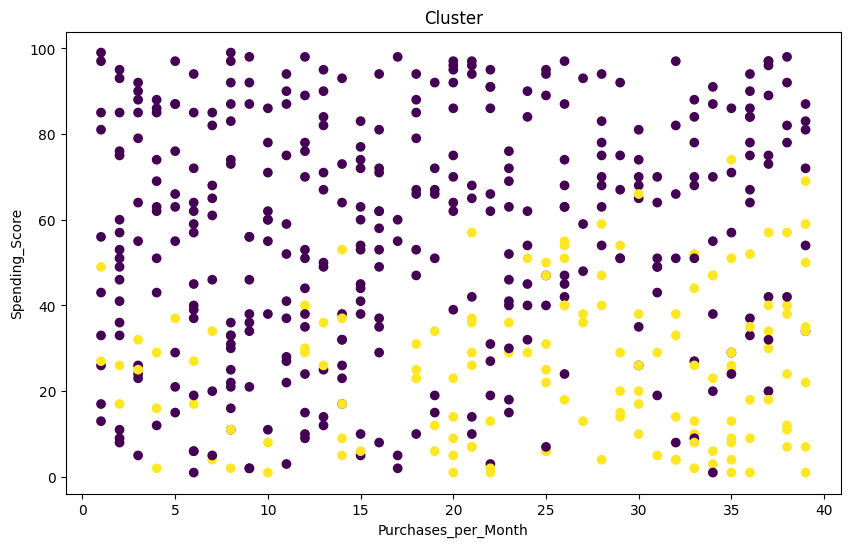

In [14]:
plt.figure (figsize = (10,6))
plt.scatter(df['Purchases_per_Month'],df['Spending_Score'],c= labels)
plt.title('Cluster')
plt.xlabel("Purchases_per_Month")
plt.ylabel("Spending_Score")
plt.show()